# Teoria

Sposób generowania zmiennej  $X\sim S_\alpha(1,\beta,0)$

Algorytm
1. Generuj $V\sim \mathcal{U}\left(-\frac{\pi}{2},\frac{\pi}{2}\right)$
1. Generuj $W\sim \mathcal{E}xp\left(1\right)$
1. Wstaw
    2. dla $\alpha \neq 1$
    $$ X=S_{\alpha,\beta}\frac{\sin\left\{\alpha\left(V+B_{\alpha,\beta}\right)\right\}}{\left\{\cos\left(V\right)\right\}^{1/\alpha}}\left[ \frac{\cos\left\{V-\alpha\left(V+B_{\alpha,\beta}\right)\right\}}{W} \right]^{\left(1-\alpha\right)/\alpha},$$
    gdzie
       $$B_{\alpha,\beta}=\frac{\arctan\left(\beta\tan\frac{\pi\alpha}{2}\right)}{\alpha},$$
       $$ S_{\alpha,\beta} = \left\{1+\beta^2\tan^2\left(\frac{\pi\alpha}{2}\right)\right)^{1/(2\alpha)};$$
    2. dla $\alpha = 1$ 
    $$ X = \frac{2}{\pi}\left\{\left(\frac{\pi}{2}+\beta V\right)\tan V-\beta\ln\left(\frac{\frac{\pi}{2}W\cos V}{\frac{\pi}{2}+\beta V}\right)\right\}$$

Jeśli chcemy obliczyć $Y\sim S_\alpha(\sigma,\beta,\mu)$ wstawiamy
$$
Y=\begin{align}
\begin{cases}
\sigma X+\mu&\alpha\neq1\\
\sigma X + \frac{2}{\pi}\beta\sigma\ln\sigma+\mu&\alpha = 1\\
\end{cases}
\end{align}
$$

W naszym przypatku $\beta=1$ oraz $\mu=0$, zatem powyższe wzory upraszczają się do

$$
Z=\begin{align}
\begin{cases}
\Delta_t^{1/\alpha}\dfrac{\sin\left(\alpha V\right)}{\left(\cos V\right)^{1/\alpha}}\left[ \dfrac{\cos\left\{\left(1-\alpha\right)V\right\}}{W} \right]^{\left(1-\alpha\right)/\alpha}
&\alpha\neq 1\\
\\
\Delta_t^{1/\alpha}\tan V
&\alpha=1\\
\end{cases}
\end{align}
$$

# Generowanie w ogólnym przypadku

## Kod

In [8]:
using Distributions

In [352]:
Alpha_stable_process(;α=1,β=0,μ=0,T=10,Δ=0.01)=begin
    local X
    σ=Δ^(1/α)
    n=round(Int,T/Δ)
    V=rand(Uniform(-π/2,π/2),n)
    W=rand(Exponential(1),n)
    if α==1
        X=@. 2/π*((π/2+β*V)*tan(V) - β*log((π/2*W*cos(V))/(π/2+β*V)))
    elseif 0<α<=2
        S=(1+β^2*tan(π*α/2)^2)^1/(2α)
        B=atan(β*tan(π*α/2))/α
        #println(minimum(@. cos(V-α*(V+B))))
        #return @.(V-α*(V+B))
        X=@. S*(sin(α*(V+B))/(cos(V)^(1/α))) * (cos(V-α*(V+B))/W)^((1-α)/α)
    else
        error("α musi być w przedziale (0,2]")
    end
    
    @. α==1 ? σ*X+2/π*β*log(σ)+μ : σ*X+μ
end

Alpha_stable_process (generic function with 6 methods)

## Wykres

In [418]:
using Plots
plot();

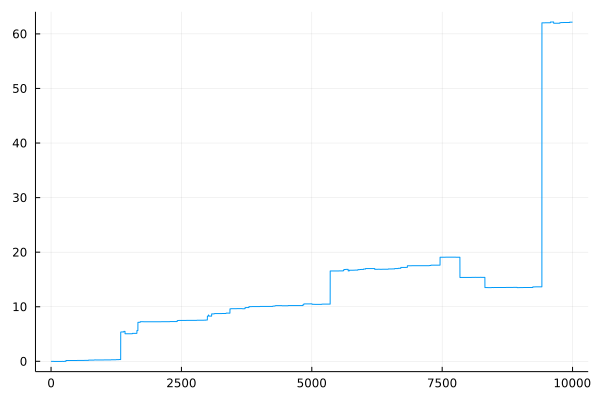

In [725]:
temp=cumsum(Alpha_stable_process(α=1/2,β=1/2,Δ=1e-3));
plot(temp,leg=false)

# Nasz przypadek

## Kod

In [419]:
using Distributions

In [708]:
Exit_time(;α=2,x=1/2,a=0,b=1,Δ=0.01,mode=:all)=begin
    X=x/Δ^(1/α)
    a′=a/Δ^(1/α)
    b′=b/Δ^(1/α)
    if α==1
        t=0
        while a′<X<b′
            X+=tan(rand(Uniform(-π/2,π/2)))
            t+=1
        end
        return  mode==:all  ? (t*Δ, X>=b′) :
                mode==:time ? Δ*t :
                mode==:way  ? X>=b′ :
                nothing
    elseif 0<α<=2
        t=0
        while a′<X<b′
            v=rand(Uniform(-π/2,π/2))
            w=rand(Exponential(1))
            X+=sin(α*v)/(cos(v)^(1/α))*(cos((1-α)*v)/w)^((1-α)/α)/√2
            t+=1
        end
        return  mode==:all  ? (t*Δ, X>=b′) :
                mode==:time ? Δ*t :
                mode==:way  ? X>=b′ :
                nothing
    end
end

Exit_time (generic function with 1 method)

## Obliczenia

In [711]:
mean(Exit_time(α=2,mode=:time,Δ=1e-4,x=1/2) for i in 1:1000)

0.2513502999999997

In [736]:
mean(Exit_time(α=1/2,mode=:time,Δ=1e-4,x=1/2) for i in 1:10000)

0.9504446699999997

In [737]:
mean(Exit_time(α=1/2,mode=:time,Δ=1e-4,a=0,b=2,x=1) for i in 1:10000)

1.3301907800000008

In [738]:
mean(Exit_time(α=1/2,mode=:time,Δ=1e-3,a=0,b=4,x=2) for i in 1:10000)

1.9056033999999977

# Test czas

In [451]:
using TimerOutputs
using Distributions

In [514]:
to = TimerOutput();

In [515]:
u=Uniform(-π/2,π/2)
N=1e7
M=Int(1e4)
for i in 1:N
    #@timeit to "rand" π .* rand(M).-π/2 
    @timeit to "uni" rand(Uniform(-π/2,π/2))
    @timeit to "uni u" rand(u)
end

In [516]:
to

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      9.63s /  25.4%           1.64GiB /  45.4%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 uni u      10.0M    1.40s   57.5%   140ns    458MiB   60.0%    48.0B
 uni        10.0M    1.04s   42.5%   104ns    305MiB   40.0%    32.0B
 ────────────────────────────────────────────────────────────────────

In [437]:
 
@timeit to "sleep" sleep(0.3)
 

In [ ]:
for i in 1:100
    @timeit to "loop" 1+1
end
 
# Nested sections are possible
@timeit to "nest 1" begin
    @timeit to "nest 2" begin
        @timeit to "nest 3.1" rand(10^3)
        @timeit to "nest 3.2" rand(10^4)
        @timeit to "nest 3.3" rand(10^5)
    end
    rand(10^6)
end

# Śmeci